## Scaling, Re-sizing, Interpolations and Cropping


Re-sizing is very easy using the cv2.resize function, it's arguments are:

cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)
- if dsize is None the output image is calculated as a function of scaling

#### List of Interpolation Methods:
- cv2.INTER_AREA - Good for shrinking or down sampling
- cv2.INTER_NEAREST - Fastest
- cv2.INTER_LINEAR - Good for zooming or up sampling (default)
- cv2.INTER_CUBIC - Better
- cv2.INTER_LANCZOS4 - Best

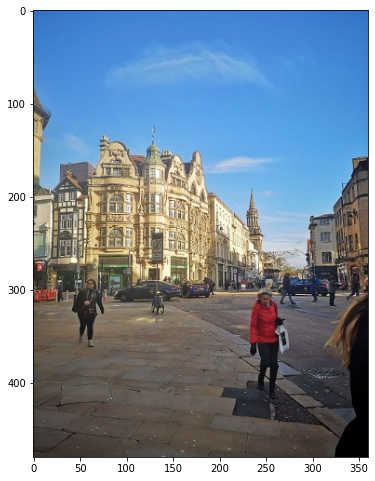

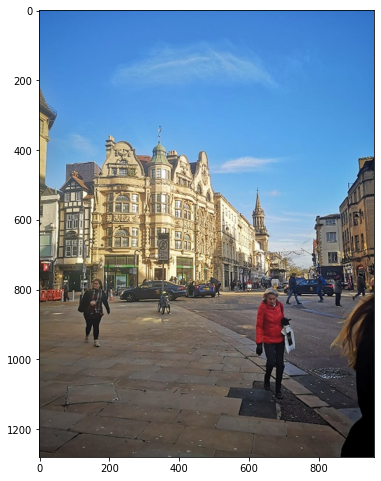

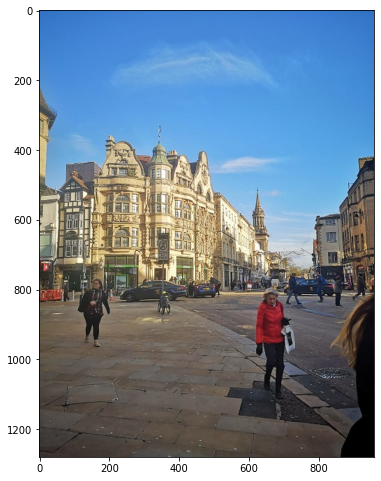

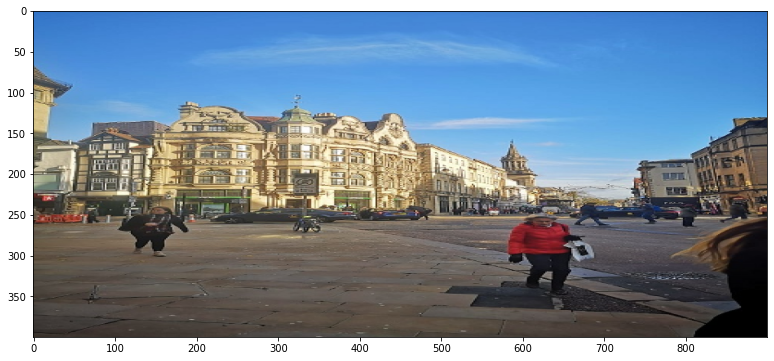

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load our input image
image = cv2.imread('images/oxford.jpg')

# If no interpolation is specified cv.INTER_LINEAR is used as default
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
plt.figure(figsize=(6, 9))
plt.imshow(image_scaled[:, :, ::-1]) 

# Let's double the size of our image
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.figure(figsize=(6, 19))
plt.imshow(img_scaled[:, :, ::-1])

# Let's double the size of our image
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
plt.figure(figsize=(6, 19))
plt.imshow(img_scaled[:, :, ::-1])

# Let's skew the re-sizing by setting exact dimensions
img_scaled = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
plt.figure(figsize=(19, 6))
plt.imshow(img_scaled[:, :, ::-1]) 


## Image Pyramids

Useful when scaling images in object detection.

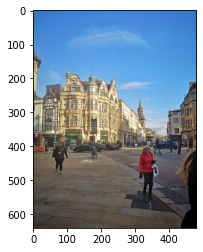

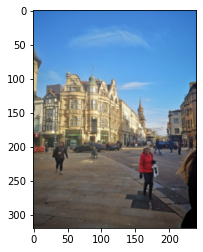

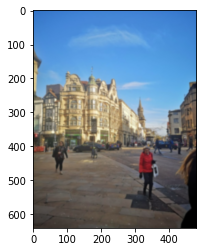

In [2]:
image = cv2.imread('images/oxford.jpg')

smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

plt.imshow(image[:, :, ::-1])
plt.figure()
plt.imshow(smaller[:, :, ::-1])
plt.figure()
plt.imshow(larger[:, :, ::-1])


## Cropping



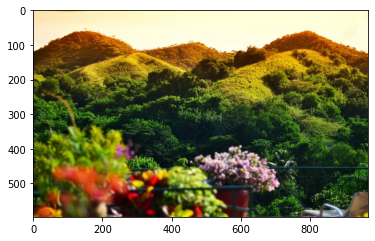

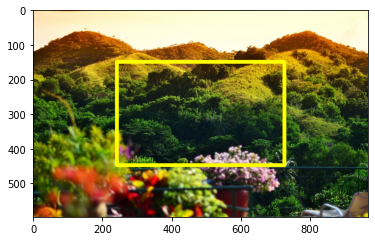

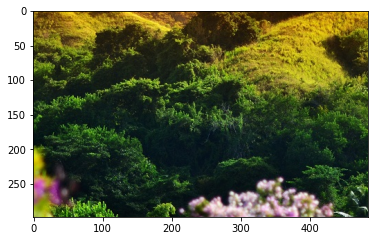

In [3]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')

# Get out image dimensions
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
# using 0.25 to get the x,y position that is 1/4 down from the top left (0,0)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]

plt.imshow(image[:, :, ::-1])

# The cv2.rectangle function draws a rectangle over our image (in-place operation)
copy = image.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 10)
plt.figure()
plt.imshow(copy[:, :, ::-1])

plt.figure()
plt.imshow(cropped[:, :, ::-1]) 
